In [1]:
# Install catalax
# !pip install catalax

In [1]:
import json
import jax.numpy as jnp
import numpy as np

import catalax as ctx
import catalax.mcmc as cmc

In [2]:
# Initialize the model
model = ctx.Model(name="PGM ENO")

# Add species
model.add_species("s0")
model.add_species("s1")
model.add_species("s2")

# Add ODEs
model.add_ode("s0", "- (vf_pgm/k_p3ga_pgm)*(s0-s1/keq_pgm)/(1+(s1/k_p2ga_pgm)+(s0/k_p3ga_pgm))")
model.add_ode("s1", 
              """(vf_pgm/k_p3ga_pgm)*(s0-s1/keq_pgm)/(1+(s1/k_p2ga_pgm)+(s0/k_p3ga_pgm))
              - (vf_eno/k_p2ga_eno)*(s1-s2/keq_eno)/(1+(s1/k_p2ga_eno)+(s2/k_PEP_eno))
              """
             )
model.add_ode("s2", "(vf_eno/k_p2ga_eno)*(s1-s2/keq_eno)/(1+(s1/k_p2ga_eno)+(s2/k_PEP_eno))")

# Prepare the model for bayes and define priors 
model.parameters.vf_eno.value = 1.35
model.parameters.vf_pgm.value = 9.4
model.parameters.keq_pgm.value = 0.19
model.parameters.keq_eno.value = 6.7
model.parameters.k_p2ga_pgm.value = 0.08
model.parameters.k_p3ga_pgm.value = 1.2
model.parameters.k_p2ga_eno.value = 0.04
model.parameters.k_PEP_eno.value = 0.5

model

Model summary


Eq(x, Matrix([[s0, s1, s2]]))

Eq(theta, Matrix([[vf_pgm, k_p3ga_pgm, k_p2ga_pgm, keq_pgm, k_p2ga_eno, vf_eno, k_PEP_eno, keq_eno]]))

Eq(Derivative(s0, t), -vf_pgm*(s0 - s1/keq_pgm)/(k_p3ga_pgm*(1 + s0/k_p3ga_pgm + s1/k_p2ga_pgm)))

Eq(Derivative(s1, t), vf_pgm*(s0 - s1/keq_pgm)/(k_p3ga_pgm*(1 + s0/k_p3ga_pgm + s1/k_p2ga_pgm)) - vf_eno*(s1 - s2/keq_eno)/(k_p2ga_eno*(1 + s1/k_p2ga_eno + s2/k_PEP_eno)))

Eq(Derivative(s2, t), vf_eno*(s1 - s2/keq_eno)/(k_p2ga_eno*(1 + s1/k_p2ga_eno + s2/k_PEP_eno)))

name      symbol  value  constant initial_value equation lower_bound  \
0   k_PEP_eno   k_PEP_eno   0.50     False          None     None        None   
1  k_p2ga_eno  k_p2ga_eno   0.04     False          None     None        None   
2  k_p2ga_pgm  k_p2ga_pgm   0.08     False          None     None        None   
3  k_p3ga_pgm  k_p3ga_pgm   1.20     False          None     None        None   
4     keq_eno     keq_eno   6.70     False          None     None        None   
5     keq_pgm     keq_pgm   0.19     False          None     None        None   
6      vf_eno      vf_eno   1.35     False          None     None        None   
7      vf_pgm      vf_pgm   9.40     False          None     None        None   

  upper_bound  
0        None  
1        None  
2        None  
3        None  
4        None  
5        None  
6        None  
7        None

In [ ]:
#See file in .../Training Set 2/Data_Training_Set_2_20242309.npy
#See file in .../Training Set 2/Time_Training_Set_2_20242309.npy
#See file in .../Training Set 2/Training_Set_2_Initials_20242309.npy
#See file in .../Training Set 2/Corrected_model_2_20242309.json


In [3]:
data = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/Testing Set 2/Data_Training_Set_2_20242309.npy")
time = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/Testing Set 2/Time_Training_Set_2_20242309.npy")
y0s = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/Testing Set 2/Training_Set_2_Initials_20242309.npy")
initial_conditions = json.load(open("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/Testing Set 2/Corrected_model_2_20242309.json", "r"))  
print(f"Time: {time.shape} | Data: {data.shape} | Initial Conditions: {y0s.shape}")
print(data.shape)
print(time.shape)
print(y0s.shape)



Time: (30, 15) | Data: (30, 15, 3) | Initial Conditions: (30, 3)
(30, 15, 3)
(30, 15)
(30, 3)


In [ ]:
#see file in Data/Testing and Validation Arrays/A and E

In [5]:
#val sets 
val_data = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/A and E/Data Validation_Set_A_and_E_20242309.npy")
val_time = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/A and E/Time_Validation_Set_A_and_E_20242309.npy")
val_y0s = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/A and E/Validation_Set_A_and_E_Initials_20242309.npy")
val_initial_conditions = json.load(open("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/A and E/model_Validation_Set_A_and_E_20242309.json", "r"))

In [6]:
# Define Priors
model.parameters.vf_eno.prior = cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.vf_pgm.prior= cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.keq_pgm.prior= cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.k_p2ga_pgm.prior = cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.k_p3ga_pgm.prior = cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.k_p2ga_eno.prior =cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.k_PEP_eno.prior=cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.keq_eno.prior=cmc.priors.Uniform(low=1e-3, high=1e1)

In [7]:
# Perform MCMC simulation
mcmc, bayes_model = cmc.run_mcmc(
    model=model,
    data=data,
    initial_conditions=initial_conditions,
    times=time,
    yerrs=2.0,
    num_warmup=1000,
    num_samples=1000,
    dt0=0.1,
    max_steps=64**4
)

🔸 Priors
├── vf_pgm: U(low=0.001, high=10.0)
├── k_p3ga_pgm: U(low=0.001, high=10.0)
├── k_p2ga_pgm: U(low=0.001, high=10.0)
├── keq_pgm: U(low=0.001, high=10.0)
├── k_p2ga_eno: U(low=0.001, high=10.0)
├── vf_eno: U(low=0.001, high=10.0)
├── k_PEP_eno: U(low=0.001, high=10.0)
├── keq_eno: U(low=0.001, high=10.0)

🚀 Running MCMC



sample: 100%|███████████████████████████| 2000/2000 [16:26<00:00,  2.03it/s, 31 steps of size 1.05e-01. acc. prob=0.73]




🎉 Finished

                  mean       std    median      5.0%     95.0%     n_eff     r_hat
   k_PEP_eno      0.28      0.23      0.22      0.03      0.58    189.09      1.00
  k_p2ga_eno      1.57      1.31      1.23      0.10      3.20    167.01      1.00
  k_p2ga_pgm      2.37      1.97      1.68      0.51      5.38     42.78      1.00
  k_p3ga_pgm      9.69      0.26      9.76      9.32      9.99    501.44      1.01
     keq_eno      3.31      0.19      3.31      3.02      3.63     89.96      1.02
     keq_pgm      0.16      0.01      0.15      0.14      0.17    102.14      1.00
       sigma      0.88      0.02      0.88      0.86      0.92     68.95      1.00
      vf_eno      8.04      1.50      8.38      5.51      9.99     21.19      1.04
      vf_pgm      0.83      0.11      0.81      0.67      1.00    126.94      1.01

Number of divergences: 22


In [8]:
# Add parameters to the model
for param, samples in mcmc.get_samples().items():
    if param not in model.parameters:
        continue
    
    model.parameters[param].value = float(samples.mean())
    
model.parameters

name      symbol     value  constant initial_value equation  \
0   k_PEP_eno   k_PEP_eno  0.284206     False          None     None   
1  k_p2ga_eno  k_p2ga_eno  1.568445     False          None     None   
2  k_p2ga_pgm  k_p2ga_pgm  2.365618     False          None     None   
3  k_p3ga_pgm  k_p3ga_pgm  9.692043     False          None     None   
4     keq_eno     keq_eno  3.307336     False          None     None   
5     keq_pgm     keq_pgm  0.155111     False          None     None   
6      vf_eno      vf_eno  8.041162     False          None     None   
7      vf_pgm      vf_pgm  0.833035     False          None     None   

  lower_bound upper_bound  
0        None        None  
1        None        None  
2        None        None  
3        None        None  
4        None        None  
5        None        None  
6        None        None  
7        None        None

C:\Users\danic\anaconda3\envs\test\Lib\site-packages\corner\core.py:133: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(
C:\Users\danic\anaconda3\envs\test\Lib\site-packages\catalax\mcmc\plotting.py:35: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


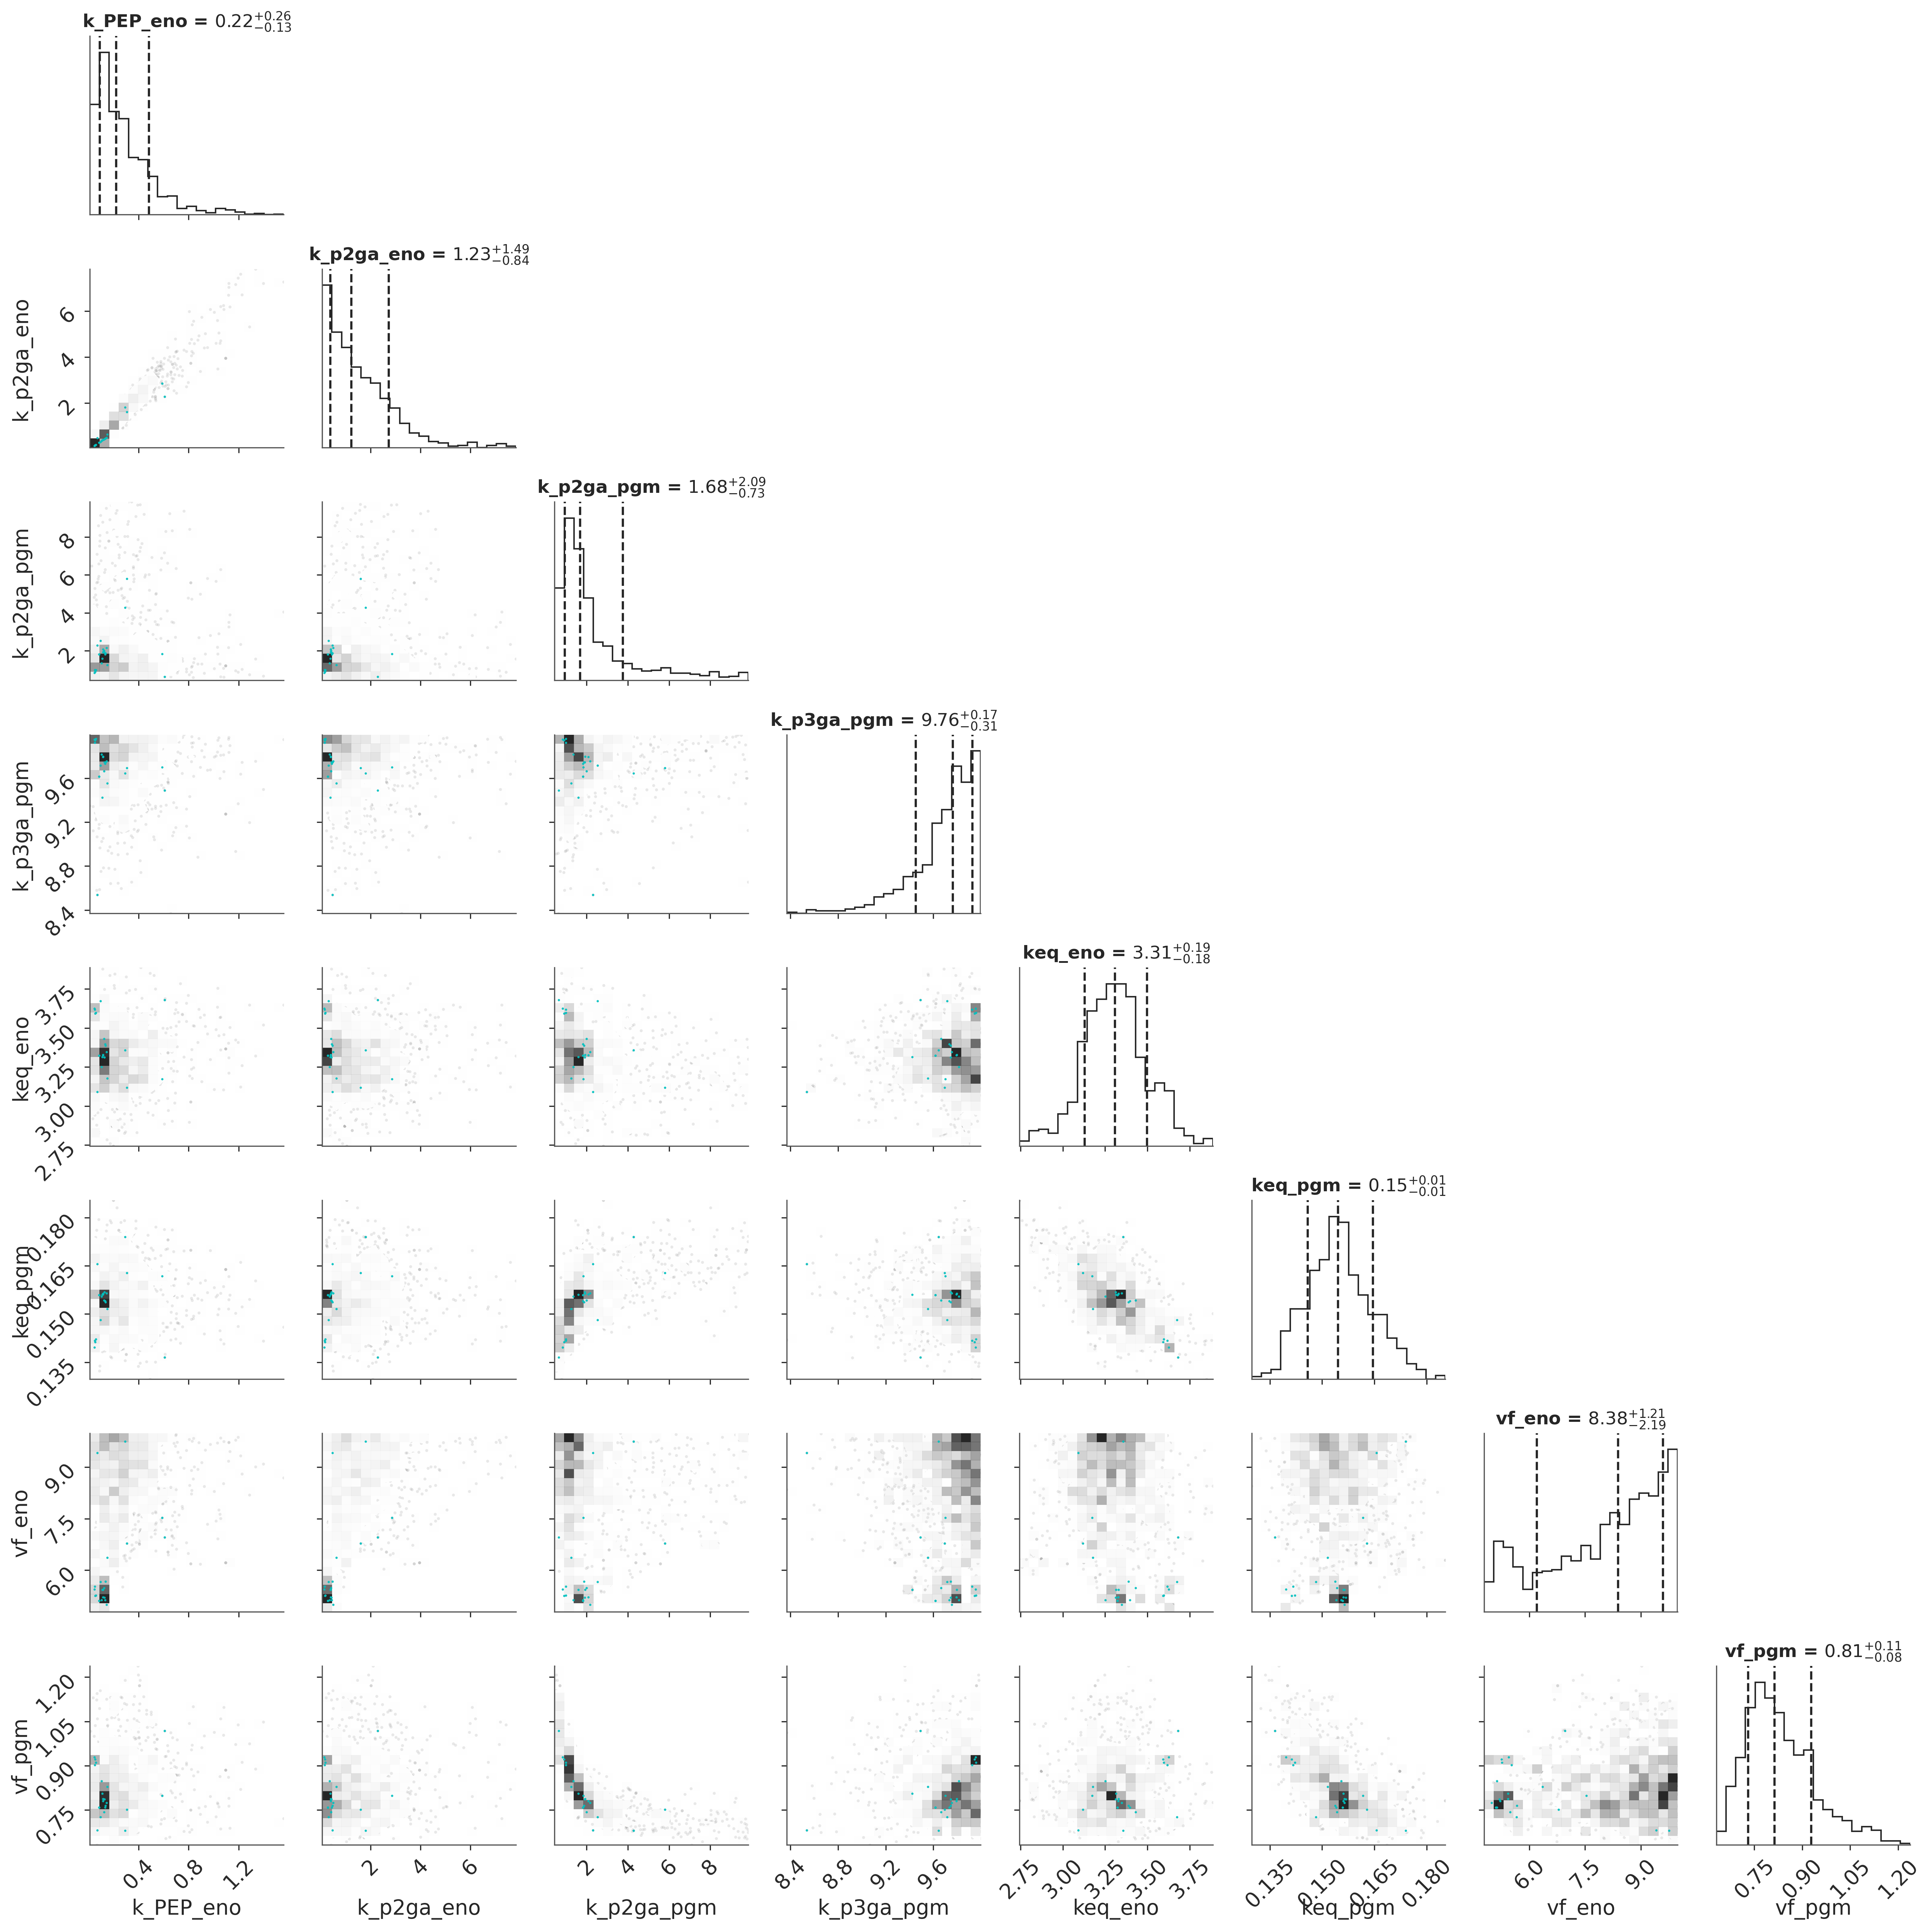

In [9]:
# Visualize the result using a corner plot
# Shows the posterior distribution of the parameters
# Shows the correlation between the parameters
fig = cmc.plot_corner(mcmc)

In [10]:
fig.savefig("C:/Users/danic/Thesis/Data/Corner_Plot_Set2_MCMC.png", dpi=300, bbox_inches="tight")

C:\Users\danic\anaconda3\envs\test\Lib\site-packages\catalax\mcmc\plotting.py:99: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


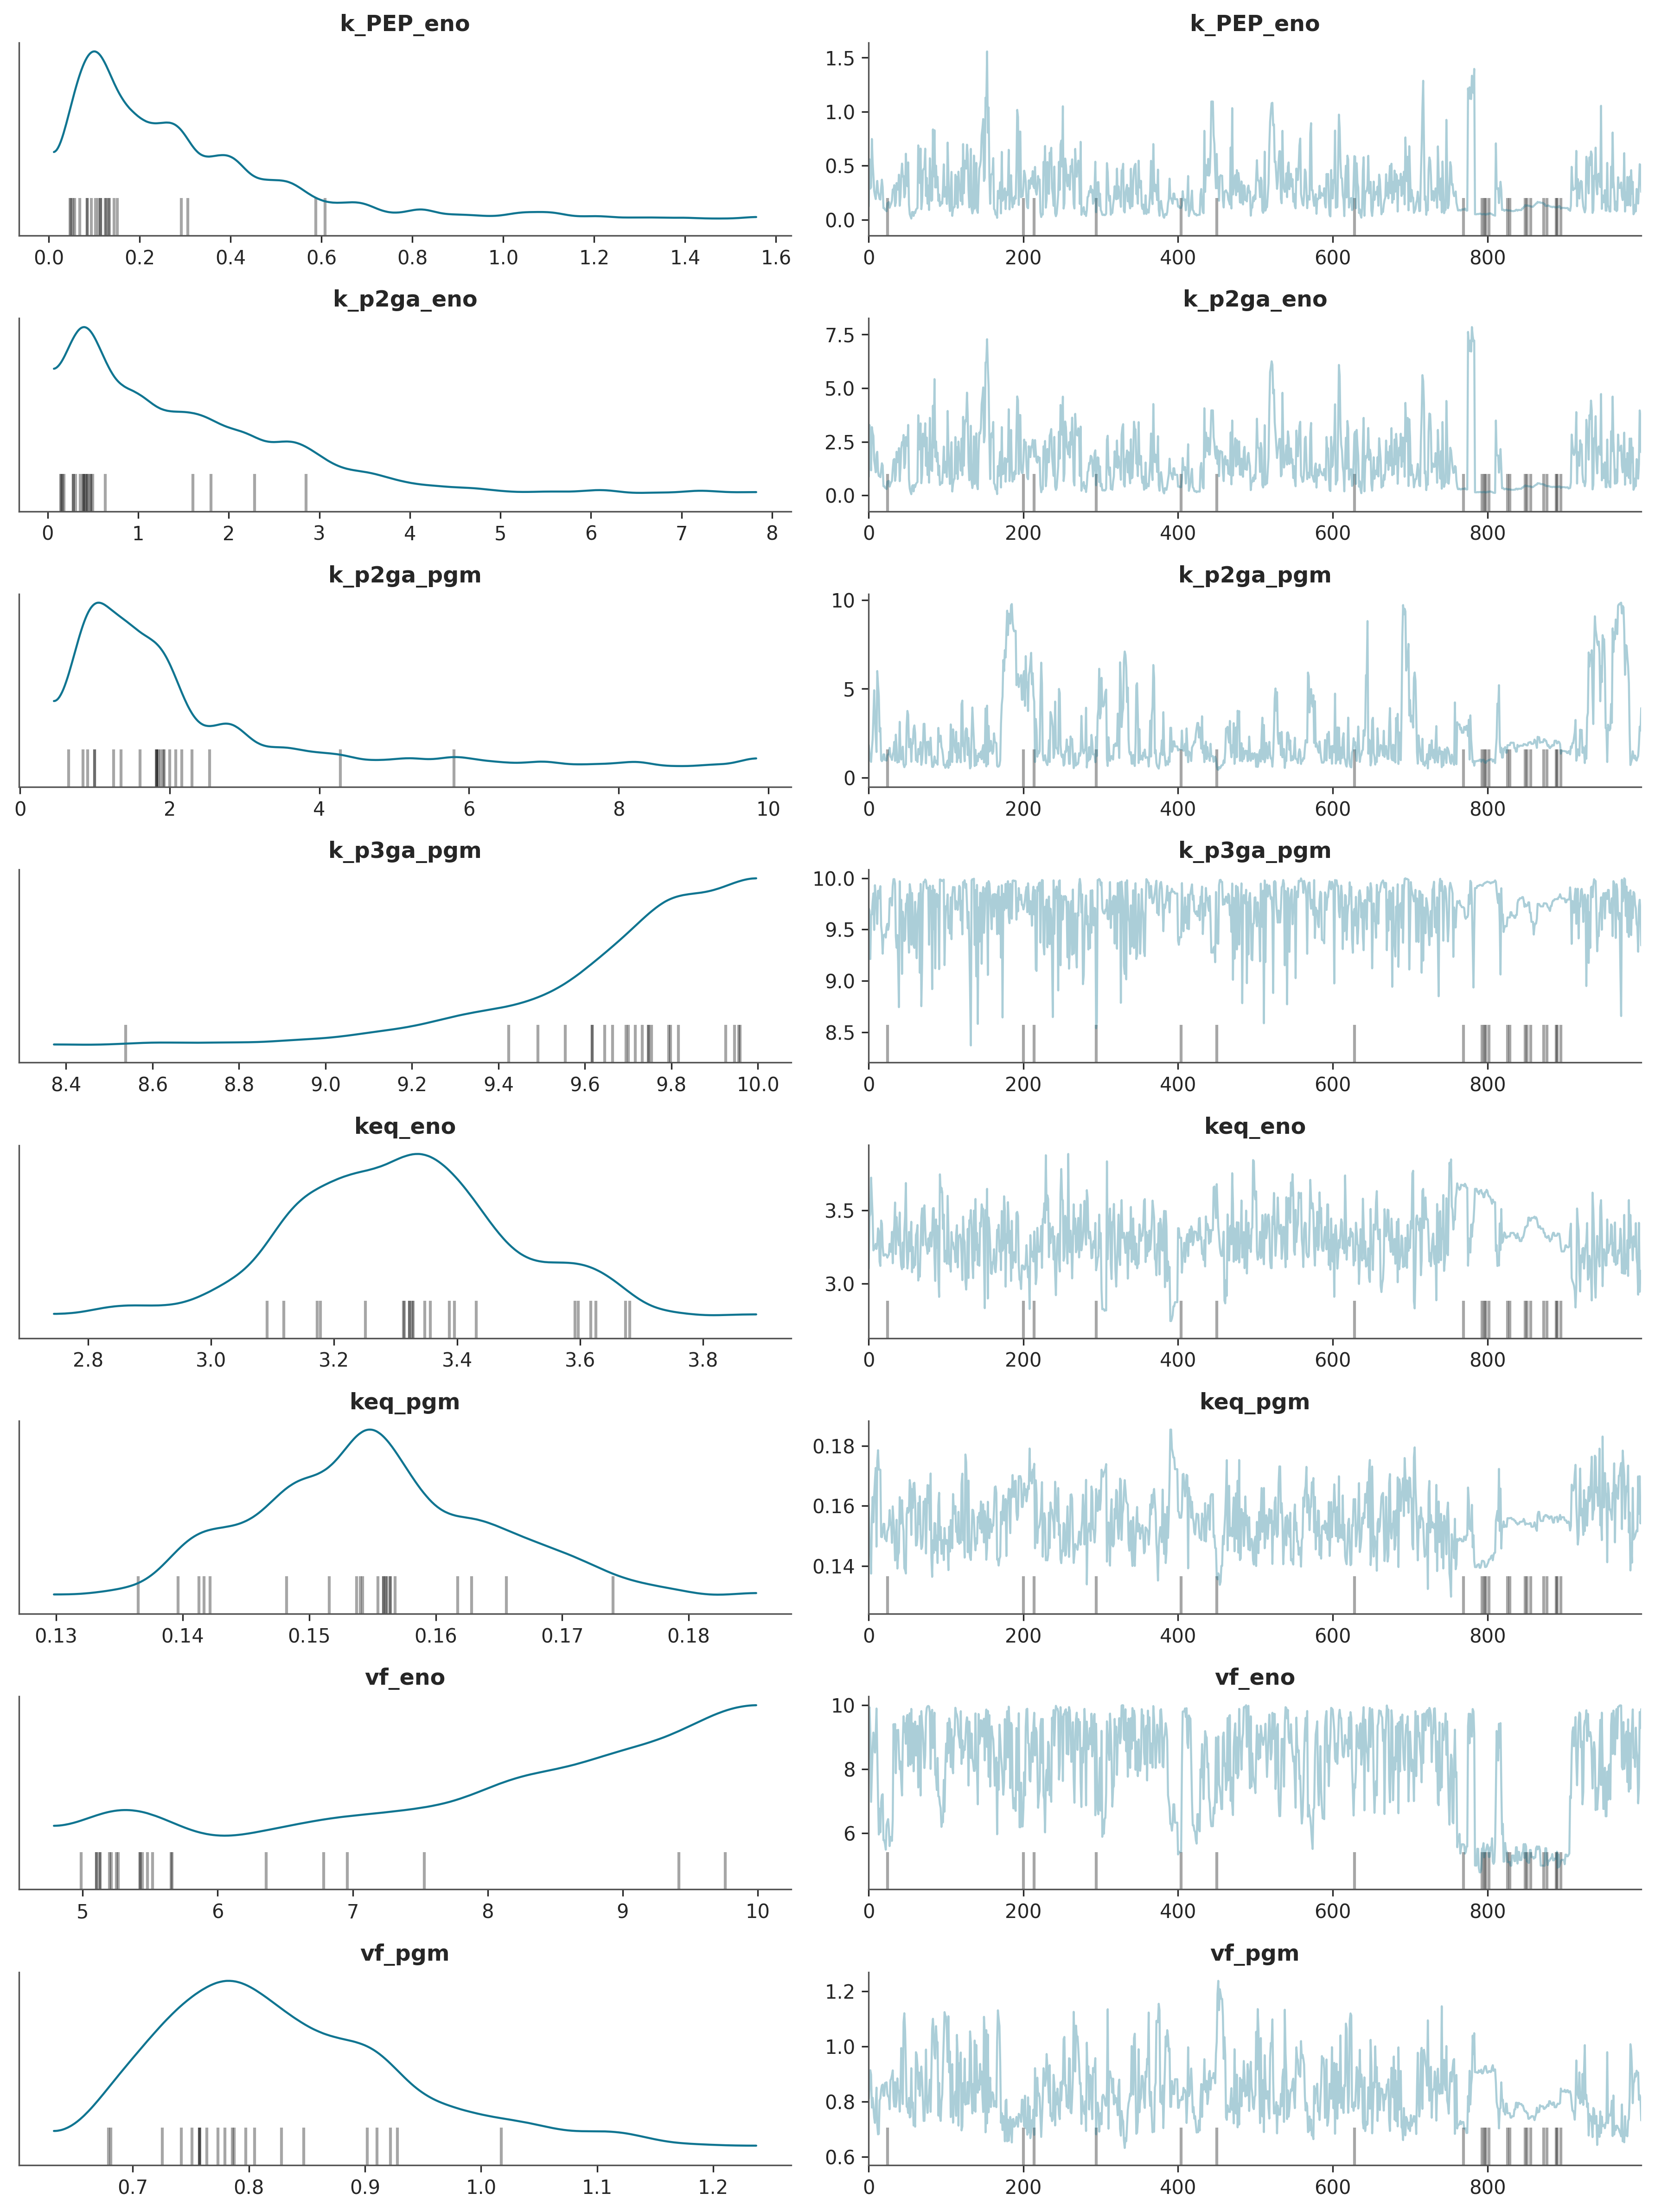

In [10]:
# Plot the trace of the MCMC (Posterior dist and chain trace)
f = cmc.plot_trace(mcmc, model)

In [8]:
result, new_model = ctx.optimize(
    model=model,
    initial_conditions=val_initial_conditions,
    data=val_data,
    times=val_time,
    global_upper_bound=1e5,
    global_lower_bound=1e-6,
    method="lmfit", 
)

C:\Users\danic\anaconda3\envs\test\Lib\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
C:\Users\danic\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


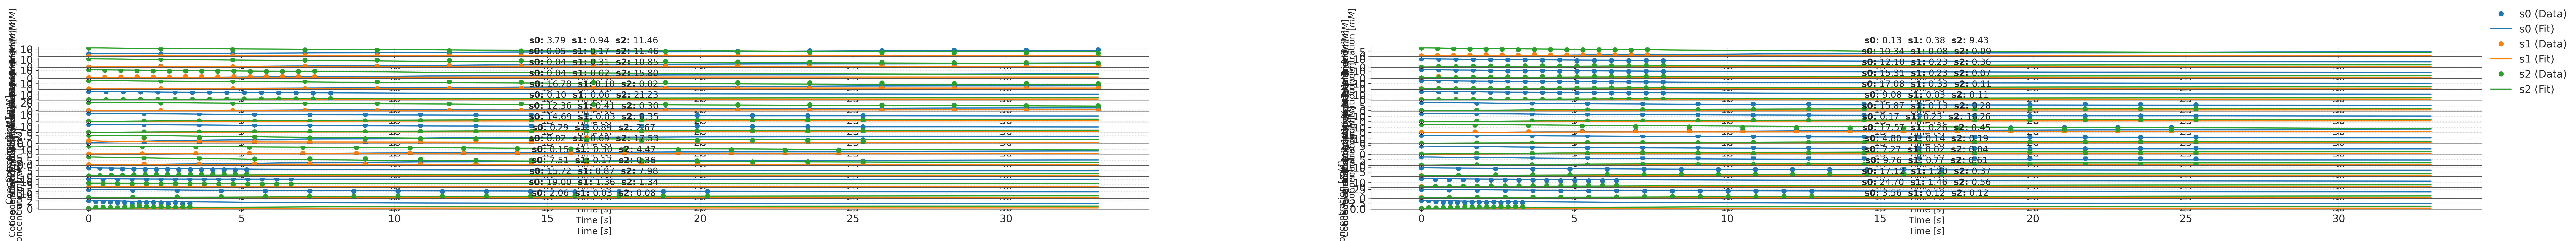

In [12]:
# Visualize fit of MCMC to data
#
# When an mcmc object is passed to visualize, the fit is plotted
# including the 90% highest posterior density interval (HPDI) of
# the parameters and thus the uncertainty of the fit.
#
# In order to see the effects, change the line in the beginning
# to the following:
#       
#      data = np.random.normal(data, 15.0).clip(min=0)
#
# This will add some noise to the data and the fit will be less
# certain and the HPDI will be wider.


f = ctx.visualize(
    model=model,
    data=data,
    times=time,
    initial_conditions=initial_conditions,
    figsize=(4,2),
    mcmc=mcmc
)

In [13]:
f.set_figwidth(9)
f.set_figheight(30)
f

MemoryError: 

<Figure size 2700x9000 with 30 Axes>

In [14]:
f.savefig("C:/Users/danic/Thesis/Data/Training_Set_1_MCMC_visualization.png", dpi=300, bbox_inches="tight")

MemoryError: In RendererAgg: Out of memory

In [ ]:
import pickle
# Save the file to a specific directory
with open("C:/Users/danic/Thesis/Data/Training_Set_1_MCMC_visualization.pkl", "wb") as file:
    pickle.dump(f, file)
